In [5]:
import geopandas
import contextily as cx

Could look at: 2020 data vs 2021 data? Boro by boro? GHG emissions vs EUI? Building type contributions to GHG? fuel type contributions to GHG? Fuel types by usage types? Combo high EUI and high ghg emissions areas/neighborhoods?

Map with top 10 GHG emitters per boro? What percent of that boros emissions do they make up?

Who is still using fuel oil?

building usage types with highest GHG emissions?

What to do with suspicious EUIs

Which usage types saw greatest decrease in emissions from 2019 to 2020?

Do i want to include population of each borough? I feel like no since commuting makes it not really accurate

What kinds of buildings are the biggest green power producers? Could city focus on those to generate more green power?

suggestion to the city-- data inputting form should check for impossible EUIs to get better data.

Correlation bt borough and EUI, prop type and EUI, buildings that are producing energy, how much do they use vs produce?



I think my question overall is: How can data be used to inform NYC's energy strategy to reach it's goal of carbon neutrality by 2050? Can I identify large areas for improvement?

In [1]:
!head LL84_2020.csv

Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,National Median ENERGY STAR Score,Target ENERGY STAR Score,Reason(s) for No Score,ENERGY STAR Certification - Year(s) Certified (Score),ENERGY STAR Certification - Eligibility,ENERGY STAR Certification - Last Approval Date,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),

In [14]:
import pandas as pd
import numpy as np
import plotly
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [9]:
col_of_interest = ["Property Id", "Address 1", "Postcode","Primary Property Type - Self Selected",\
                   "Year Built", "Site EUI (kBtu/ft²)", "Site Energy Use (kBtu)",\
                   "Green Power - Onsite (kWh)","Total GHG Emissions (Metric Tons CO2e)", "Borough",\
                   'Largest Property Use Type - Gross Floor Area (ft²)',\
                   '2nd Largest Property Use - Gross Floor Area (ft²)',\
                   '3rd Largest Property Use Type - Gross Floor Area (ft²)','Latitude','Longitude']



data2020 = pd.read_csv('Data_2020.csv', usecols = col_of_interest, dtype = {"Address 1": str, \
                                                                          }, na_values = ["Not Available"])

data2019 = pd.read_csv('Data_2019.csv', usecols = col_of_interest, dtype = {"Address 1": str, \
                                                                          }, na_values = ["Not Available"])
#deal with annoying column names
#deal with annoying missing things and assign data types

/var/folders/8p/6k3vrp795231q_pwy6nvxz5w0000gn/T/ipykernel_93878/3879758288.py:10: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data2020 = pd.read_csv('Data_2020.csv', usecols = col_of_interest, dtype = {"Address 1": str, \
/var/folders/8p/6k3vrp795231q_pwy6nvxz5w0000gn/T/ipykernel_93878/3879758288.py:13: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data2019 = pd.read_csv('Data_2019.csv', usecols = col_of_interest, dtype = {"Address 1": str, \


In [10]:
data2020['GSF'] = np.nansum([data2020['3rd Largest Property Use Type - Gross Floor Area (ft²)'],\
data2020['2nd Largest Property Use - Gross Floor Area (ft²)'],\
data2020['Largest Property Use Type - Gross Floor Area (ft²)']], axis = 0)




data2020 = data2020.drop(['Largest Property Use Type - Gross Floor Area (ft²)',\
               '2nd Largest Property Use - Gross Floor Area (ft²)',\
               '3rd Largest Property Use Type - Gross Floor Area (ft²)'], axis = 1)



In [11]:
data2019['GSF'] = np.nansum([data2019['3rd Largest Property Use Type - Gross Floor Area (ft²)'],\
data2019['2nd Largest Property Use - Gross Floor Area (ft²)'],\
data2019['Largest Property Use Type - Gross Floor Area (ft²)']], axis = 0)

data2019 = data2019.drop(['Largest Property Use Type - Gross Floor Area (ft²)',\
               '2nd Largest Property Use - Gross Floor Area (ft²)',\
               '3rd Largest Property Use Type - Gross Floor Area (ft²)'], axis = 1)



Ok what I'm doing below is finding out what types of 

In [15]:
# sites_w_green2020 = data2020[['Green Power - Onsite (kWh)']].dropna(axis = 0, how = 'any')
green_power_sites_2020 = data2020[data2020['Green Power - Onsite (kWh)'] > 0]

prop_type_green_pow = green_power_sites_2020.groupby('Primary Property Type - Self Selected').agg('sum')\
[['Green Power - Onsite (kWh)','GSF']].sort_values(['Green Power - Onsite (kWh)'], ascending = False)

prop_type_green_pow['kWh/GSF']= prop_type_green_pow['Green Power - Onsite (kWh)']/prop_type_green_pow['GSF']

prop_type_counts = green_power_sites_2020.groupby('Primary Property Type - Self Selected')[['Green Power - Onsite (kWh)']].agg('count')#\
prop_type_counts.columns = ['Count']

selected_prop_types = pd.concat([prop_type_green_pow, prop_type_counts], axis = 1)

selected_prop_types = selected_prop_types[selected_prop_types['Count'] >= 3]

selected_prop_types


Green Power - Onsite (kWh)         GSF  \
Primary Property Type - Self Selected                                           
K-12 School                                           137759243.1   7614799.0   
Multifamily Housing                                     6121431.0  16000633.0   
Distribution Center                                     1605232.7    381188.0   
Retail Store                                            1277660.0    638000.0   
Manufacturing/Industrial Plant                           306094.5    628763.0   

                                         kWh/GSF  Count  
Primary Property Type - Self Selected                    
K-12 School                            18.090989     32  
Multifamily Housing                     0.382574     33  
Distribution Center                     4.211131      5  
Retail Store                            2.002602      3  
Manufacturing/Industrial Plant          0.486820      4

Wow there are only 86 sites producing green energy according to this. Would be interesting how much sqft this makes up of all the buildings of that type. How much green energy potential does the city have if all the buildings of the same type were to produce green power at the same rate/sqft? A weakness of this is that I don't have a ton of data points for each category, besides schools and multifamily housing.

What I've found here: the kWh/GSF able to be generated for five different primary property types. These were the primary property types that had at least 3 instances of a building with green power generation. The good thing is, multifamily housing and k12 schools are two of the top 3 primary prop types by GSF in the data.

Next steps: make a pie chart of the green energy generators?
Extrapolate my findings from there to all the data.

In [16]:
GSF_by_prop_type = data2020.groupby('Primary Property Type - Self Selected').agg('sum')[['GSF']]\
.sort_values(['GSF'], ascending = False)

GSF_by_prop_type.columns = ['Citywide GSF']

projected_green_pow = pd.concat([GSF_by_prop_type, selected_prop_types], join = 'inner', axis = 1)

projected_green_pow['Green Power Gen Potential (kWh)'] = projected_green_pow['kWh/GSF']*projected_green_pow['Citywide GSF']

projected_green_pow

round(projected_green_pow['Green Power Gen Potential (kWh)'].agg('sum')/1000000000,3)

4.26

In [17]:
4.26/52.5

0.08114285714285714

So according to my calculations above, if green power were to be generated from the five property types at the same rate for all the buildings of that type included in the data set, NYC could generate 4.26 Tetrawatt hrs per year, which according to this website, is about 8% of NYC's electricity use. (I guess I could look at the total electricity use in the dataset.... idk... I guess its not that hard...)Which is not a huge amount but a lot more than we're getting from green sources now!

https://www.buildingcongress.com/advocacy-and-reports/reports-and-analysis/Electricity-Outlook-2017-Powering-New-York-Citys-Future/The-Electricity-Outlook-to-2027.html#:~:text=Annual%20energy%20consumption%20in%20New,year%20over%20the%20forecast%20period.

In [18]:
import plotly.express as px
fig = px.pie(prop_type_green_pow, values='Green Power - Onsite (kWh)', names = prop_type_green_pow.index,\
             title='Green Power Generators by Property Type')
fig.show()

In [19]:
data2019[data2019['Green Power - Onsite (kWh)'] > 0]

Property Id                  Address 1 Postcode  \
125        1633020        2545 Gunther Avenue    10469   
129        1633028        111 Columbia Street    10002   
143        1633056       145 West 84th Street    10024   
214        1633201  121-10 Rockaway Boulevard    11420   
261        1633296   3000 East Tremont Avenue    10461   
...            ...                        ...      ...   
26459     10536715     112 Richmond Hill Road    10314   
26720     10756385     100 Richmond Hill Road    10314   
26874     10821839       1102 Atlantic Avenue    11238   
27566     11585842         333 Stanley Avenue    11207   
28217     12068902             392 BRISTOL ST    11212   

      Primary Property Type - Self Selected  Year Built  Site EUI (kBtu/ft²)  \
125                             K-12 School        1965                 48.0   
129                             K-12 School        1958                 44.8   
143                             K-12 School        1965                 48.9   
214                             K-12 School        1973                 63.5   
261                             K-12 School        1967                 83.7   
...                                     ...         ...                  ...   
26459                          Retail Store        1975                 47.0   
26720                          Retail Store        1975                 70.9   
26874        Manufacturing/Industrial Plant        1929                 33.3   
27566                   Distribution Center        1958                 72.0   
28217                   Multifamily Housing        1976                 67.7   

       Site Energy Use (kBtu)  Green Power - Onsite (kWh)  \
125                 9057062.0                    182039.9   
129                 8112060.7                    104569.1   
143                15204137.8                     48868.7   
214                15924602.1                    155011.5   
261                35022116.2                    309764.5   
...                       ...                         ...   
26459               2226052.5                    445112.0   
26720              19252114.5                    470387.0   
26874               1496259.9                     65794.0   
27566               2880575.4                     56160.0   
28217              40752403.1                    488125.2   

       Total GHG Emissions (Metric Tons CO2e)    Borough   Latitude  \
125                                     630.8      BRONX  40.863735   
129                                     547.0  MANHATTAN  40.718895   
143                                    1156.0  MANHATTAN  40.785803   
214                                     963.8     QUEENS  40.675771   
261                                    2045.7      BRONX  40.840702   
...                                       ...        ...        ...   
26459                                    56.2  STATEN IS  40.584301   
26720                                  1105.1  STATEN IS  40.587323   
26874                                   101.5   BROOKLYN  40.679518   
27566                                   142.8   BROOKLYN  40.654359   
28217                                  2753.4   BROOKLYN  40.661527   

       Longitude       GSF  
125   -73.836070  188575.0  
129   -73.979308  181200.0  
143   -73.974614  311000.0  
214   -73.816938  250800.0  
261   -73.838545  418550.0  
...          ...       ...  
26459 -74.164907   47357.0  
26720 -74.164789  271643.0  
26874 -73.956819   44923.0  
27566 -73.895531   40000.0  
28217 -73.910594  601873.0  

[86 rows x 13 columns]

In [20]:
data2020.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum()

Total GHG Emissions (Metric Tons CO2e)
Borough                                          
BRONX                                   6669110.9
BROOKLYN                                2995492.6
MANHATTAN                               8969144.0
QUEENS                                  2557647.0
STATEN IS                                412257.3

In [21]:
type(data2020["Total GHG Emissions (Metric Tons CO2e)"][0])

numpy.float64

In [22]:
data2019.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum()

Total GHG Emissions (Metric Tons CO2e)
Borough                                          
BRONX                                   2798239.2
BROOKLYN                                3471987.0
MANHATTAN                              11694356.2
QUEENS                                  3136121.8
STATEN IS                                501618.1

In [23]:
comparison = pd.concat([data2019.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum(),\
       data2020.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum()], axis = 1)

# comparison['Percent_Change'] = comparison[[1]]-comparison[[2]]

comparison.columns = ['2019_MTCO2e','2020_MTCO2e']
comparison['Percent_Change'] = 100*(comparison['2020_MTCO2e'] - comparison['2019_MTCO2e'])/comparison['2019_MTCO2e']

comparison
#this makes me suspicious of bronx data

2019_MTCO2e  2020_MTCO2e  Percent_Change
Borough                                            
BRONX        2798239.2    6669110.9      138.332409
BROOKLYN     3471987.0    2995492.6      -13.723968
MANHATTAN   11694356.2    8969144.0      -23.303653
QUEENS       3136121.8    2557647.0      -18.445546
STATEN IS     501618.1     412257.3      -17.814509

In [24]:
#looking at bronx

bronx2020 = data2020[data2020['Borough'] == "BRONX"]
bronx2020.sort_values(['Total GHG Emissions (Metric Tons CO2e)'], ascending = False)
#Aha. somebody got their data way wrong. 4 million tons co2e from a senior care community. Should def remove this one.
#fill in from 2019 data?

Property Id                      Address 1 Postcode  \
19073      6720128               2175 Quarry Road    10457   
11366      5949517       2020 East Tremont Avenue    10462   
24767     12049536  1980-2040 East Tremont Avenue    10462   
27541     16087623       2000 East Tremont Avenue    10462   
2991       2698145        1300 Morris Park Avenue    10461   
...            ...                            ...      ...   
25518     12899134             1190 LONGWOOD AVE.    10474   
25645     13294622             2197 Cruger Avenue    10462   
27545     16089230              695 E139th Street    10454   
27569     16089942              560 E144th Street    10454   
27586     16090119           465 St. Ann's Avenue    10455   

      Primary Property Type - Self Selected  Year Built  Site EUI (kBtu/ft²)  \
19073                 Senior Care Community        1943             152022.8   
11366                   Multifamily Housing        1939                383.4   
24767                   Multifamily Housing        1939                367.2   
27541                   Multifamily Housing        1941                 94.7   
2991                                  Other        1954                524.7   
...                                     ...         ...                  ...   
25518        Manufacturing/Industrial Plant        1950                  NaN   
25645                   Multifamily Housing        1928                  NaN   
27545                   Multifamily Housing        1969                  NaN   
27569                   Multifamily Housing        1970                  NaN   
27586                   Multifamily Housing        1973                  NaN   

       Site Energy Use (kBtu)  Green Power - Onsite (kWh)  \
19073            6.403716e+10                         NaN   
11366            9.237396e+08                         NaN   
24767            9.237013e+08                         NaN   
27541            8.340865e+08                         NaN   
2991             6.837148e+08                         NaN   
...                       ...                         ...   
25518                     NaN                         NaN   
25645                     NaN                         NaN   
27545                     NaN                         NaN   
27569                     NaN                         NaN   
27586                     NaN                         NaN   

       Total GHG Emissions (Metric Tons CO2e) Borough  Longitude   Latitude  \
19073                               4250523.3   BRONX -73.890409  40.852341   
11366                                 50433.3   BRONX -73.859406  40.841773   
24767                                 50430.3   BRONX -73.860328  40.841667   
27541                                 48051.9   BRONX -73.859790  40.841727   
2991                                  40674.7   BRONX -73.844823  40.851182   
...                                       ...     ...        ...        ...   
25518                                     NaN   BRONX -73.891232  40.813344   
25645                                     NaN   BRONX -73.866649  40.856265   
27545                                     NaN   BRONX -73.913246  40.805922   
27569                                     NaN   BRONX -73.915035  40.811048   
27586                                     NaN   BRONX -73.914357  40.812488   

             GSF  
19073   421234.0  
11366  2409161.0  
24767  2808161.0  
27541  8850612.0  
2991   1303020.0  
...          ...  
25518    33000.0  
25645    70296.0  
27545    12849.0  
27569     7308.0  
27586     7625.0  

[5188 rows x 13 columns]

In [25]:
data2019[data2019['Property Id'] == 6720128]

Property Id         Address 1 Postcode  \
21360      6720128  2175 Quarry Road    10457   

      Primary Property Type - Self Selected  Year Built  Site EUI (kBtu/ft²)  \
21360                 Senior Care Community        1943                487.1   

       Site Energy Use (kBtu)  Green Power - Onsite (kWh)  \
21360             205180526.3                         NaN   

       Total GHG Emissions (Metric Tons CO2e) Borough   Latitude  Longitude  \
21360                                 12611.5   BRONX  40.852341 -73.890409   

            GSF  
21360  421234.0

In [26]:
data2020 = data2020.loc[data2020['Property Id'] != 6720128]

           2019_MTCO2e  2020_MTCO2e  Percent_Change
Borough                                            
BRONX        2798239.2    2418587.6      -13.567518
BROOKLYN     3471987.0    2995492.6      -13.723968
MANHATTAN   11694356.2    8969144.0      -23.303653
QUEENS       3136121.8    2557647.0      -18.445546
STATEN IS     501618.1     412257.3      -17.814509


Text(0.5, 1.0, 'Greenhouse Gas Emissions from Buildings by Borough, 2019 vs. 2020')

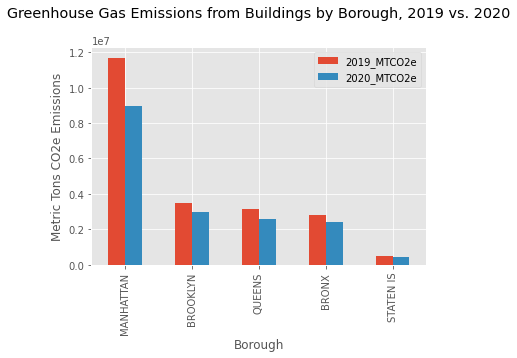

In [27]:
#Now this table is more realistic after removing the bronx outlier value.
comparison = pd.concat([data2019.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum(),\
       data2020.groupby(['Borough'])[['Total GHG Emissions (Metric Tons CO2e)']].sum()], axis = 1)

# comparison['Percent_Change'] = comparison[[1]]-comparison[[2]]

comparison.columns = ['2019_MTCO2e','2020_MTCO2e']
comparison['Percent_Change'] = 100*(comparison['2020_MTCO2e'] - comparison['2019_MTCO2e'])/comparison['2019_MTCO2e']

print(comparison)

comparison.sort_values(['2019_MTCO2e'], ascending = False)[['2019_MTCO2e','2020_MTCO2e']].plot(kind= 'bar')
plt.ylabel('Metric Tons CO2e Emissions')
plt.title('Greenhouse Gas Emissions from Buildings by Borough, 2019 vs. 2020', pad = 30)

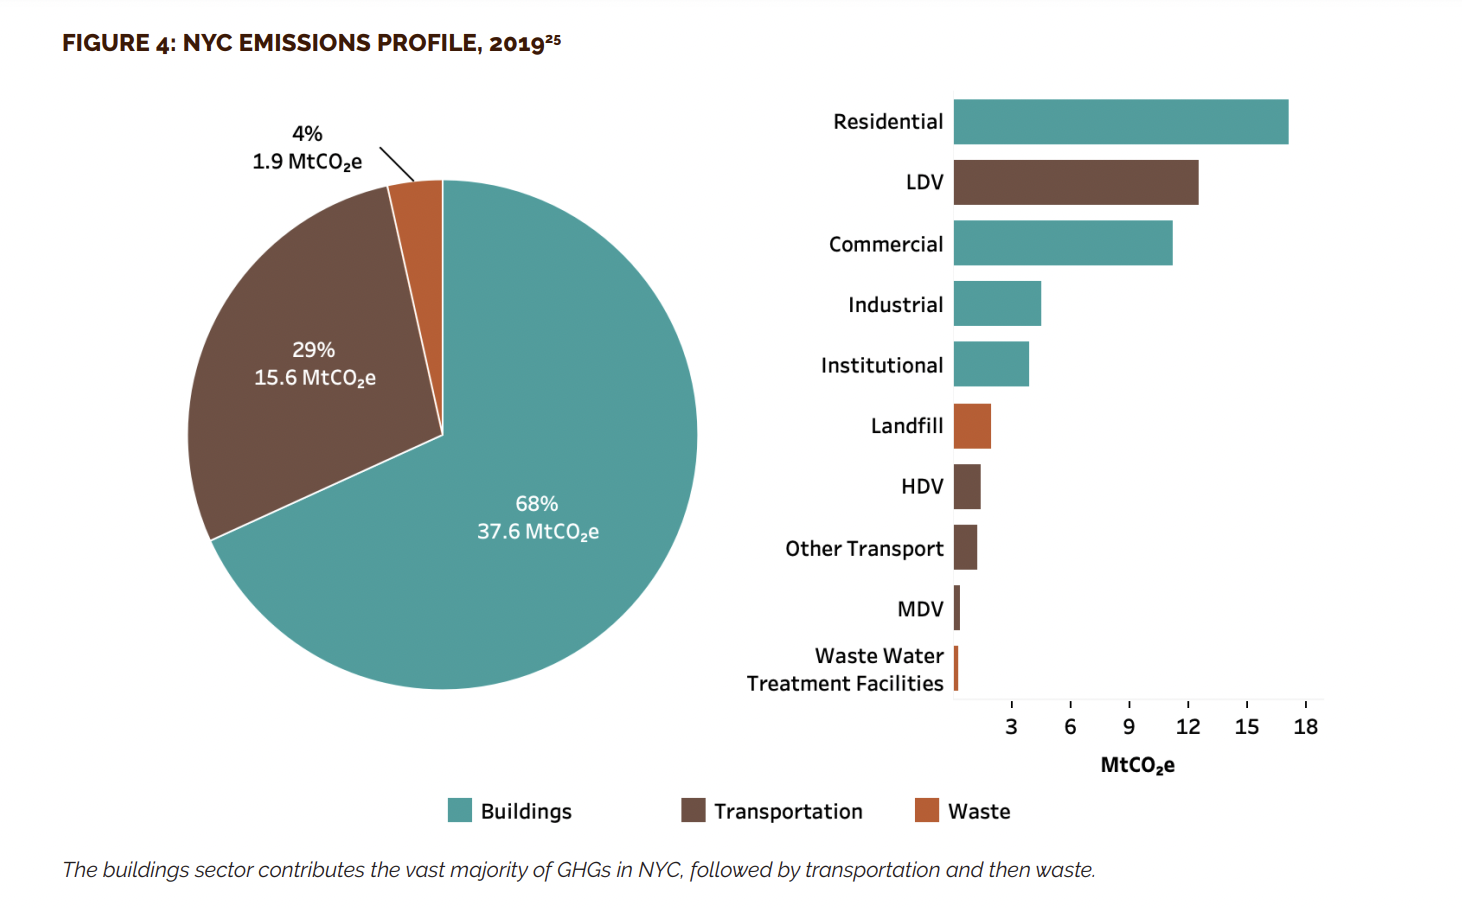

https://www1.nyc.gov/assets/sustainability/downloads/pdf/publications/Carbon-Neutral-NYC.pdf

In [28]:
#percent of buildings in NYC included in the data
print(len(data2019)/1000000*100)

#percent of emissions made up by buildings in the data compared to all buildings in the city

((data2019['Total GHG Emissions (Metric Tons CO2e)'].agg('sum')/1000000)/37.6)*100


2.9084


61.02271542553191

Each borough saw a decrease in GHG emissions from 2019 to 2020, likely due to changes in occupancy and operation during the early part of the COVID-19 pandemic. Manhattan saw the greatest decrease, with 23% lower emissions in 2020. The Bronx and Brooklyn saw the smallest decrease, with about 13.5% lower emissions in 2020. 2021 data is not yet available, but it will be interesting to see if any of the GHG emission decreases were permanent, or if they returned to normal levels in 2021.


In [29]:
#looking at Manhattan

manhattan2020 = data2020[data2020['Borough'] == 'MANHATTAN']
manhattan2020.sort_values(['Total GHG Emissions (Metric Tons CO2e)'], ascending = False).head(15)

Property Id                   Address 1 Postcode  \
7117       3616399  70 Washington Square South    10012   
9115       4452255            550 First Avenue    10016   
7983       4143131            522 First Avenue    10016   
5003       2826188           251 Mercer Street    10012   
27896     16828455                  31 W 34 St    10001   
1965       2658585       530 West 120th Street    10027   
1138       2364110          Rockefeller Center    10111   
6            28402        525 East 68th Street    10021   
25159     12347167                 462 1st Ave    10016   
21844      7536925              111 8th Avenue    10011   
25044     12344537             181 Convent Ave    10031   
24871     12066732            1230 York Avenue    10065   
25170     12347242                1000 5th Ave    10028   
25865     14746107           500 West 33rd St.    10001   
14035      6294249                Wards Island    10035   

       Primary Property Type - Self Selected  Year Built  Site EUI (kBtu/ft²)  \
7117                      Mixed Use Property        1833                201.0   
9115   Hospital (General Medical & Surgical)        1952                353.2   
7983                              Laboratory        2006               4530.8   
5003                      College/University        1966               6841.7   
27896                                 Office        1912               3586.8   
1965                      College/University        1988               4522.6   
1138                                  Office        1939                 83.4   
6      Hospital (General Medical & Surgical)        1932                379.3   
25159  Hospital (General Medical & Surgical)        1968                201.0   
21844                                 Office        1932                246.5   
25044                     College/University        1972                172.8   
24871                             Laboratory        1906                386.6   
25170                     Mixed Use Property        1878                183.1   
25865                                 Office        2019                136.2   
14035             Wastewater Treatment Plant        1937                243.7   

       Site Energy Use (kBtu)  Green Power - Onsite (kWh)  \
7117             1.386890e+09                         NaN   
9115             1.250287e+09                         NaN   
7983             1.178089e+09                         NaN   
5003             1.220034e+09                         NaN   
27896            9.885525e+08                         NaN   
1965             9.949322e+08                         NaN   
1138             6.853902e+08                         NaN   
6                1.062846e+09                         NaN   
25159            6.751526e+08                         NaN   
21844            5.759197e+08                         NaN   
25044            5.869352e+08                         NaN   
24871            6.016626e+08                         NaN   
25170            4.391768e+08                         NaN   
25865            5.190106e+08                         NaN   
14035            3.824382e+08                         NaN   

       Total GHG Emissions (Metric Tons CO2e)    Borough  Longitude  \
7117                                  78844.2  MANHATTAN -73.997027   
9115                                  73126.4  MANHATTAN -73.974594   
7983                                  67510.9  MANHATTAN -73.975172   
5003                                  66091.7  MANHATTAN -73.995414   
27896                                 65718.5  MANHATTAN -73.986480   
1965                                  56204.4  MANHATTAN -73.960217   
1138                                  50985.7  MANHATTAN -73.977844   
6                                     50765.6  MANHATTAN -73.955251   
25159                                 48336.2  MANHATTAN -73.976624   
21844                                 45247.6  MANHATTAN -74.001844   
25044  

Text(0, 0.5, 'EUI')

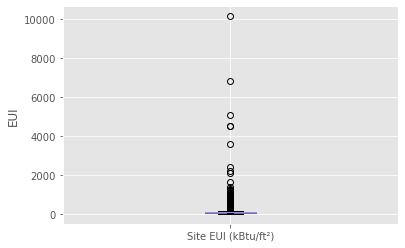

In [30]:
# plt.hist(manhattan2020['Site EUI (kBtu/ft²)'])
data2020[['Site EUI (kBtu/ft²)']].boxplot()
plt.ylabel('EUI')

#still have some big outliers but not as bad as before.

#cutoff is 2000 or some no of stds from the mean???

In [31]:
data2020.sort_values(['Site EUI (kBtu/ft²)'], ascending = False)
#Hm. I guess energy/power station makes sense to have high energy use?


Property Id                  Address 1 Postcode  \
11101      5863726             2701 WEST 6 ST    11224   
5003       2826188          251 Mercer Street    10012   
22413      8726877     4435 Victory Boulevard    10314   
7983       4143131           522 First Avenue    10016   
1965       2658585      530 West 120th Street    10027   
...            ...                        ...      ...   
28051     16897277       1266 Olmstead Avenue    10462   
28054     16897295       1266 Olmstead Avenue    10462   
28063     17298485   110-31 Merrick Boulevard    11433   
28064     17298486  110-31A Merrick Boulevard    11433   
28066     17333571       110-31B Merrick Blvd    11433   

      Primary Property Type - Self Selected  Year Built  Site EUI (kBtu/ft²)  \
11101                  Energy/Power Station        1965              10164.9   
5003                     College/University        1966               6841.7   
22413        Manufacturing/Industrial Plant        1996               5101.0   
7983                             Laboratory        2006               4530.8   
1965                     College/University        1988               4522.6   
...                                     ...         ...                  ...   
28051                   Multifamily Housing        1928                  NaN   
28054                   Multifamily Housing        1928                  NaN   
28063                      Worship Facility        1997                  NaN   
28064                      Worship Facility        1997                  NaN   
28066                      Worship Facility        1997                  NaN   

       Site Energy Use (kBtu)  Green Power - Onsite (kWh)  \
11101            6.464850e+08                         NaN   
5003             1.220034e+09                         NaN   
22413            2.236953e+09                         NaN   
7983             1.178089e+09                         NaN   
1965             9.949322e+08                         NaN   
...                       ...                         ...   
28051                     NaN                         NaN   
28054                     NaN                         NaN   
28063                     NaN                         NaN   
28064                     NaN                         NaN   
28066                     NaN                         NaN   

       Total GHG Emissions (Metric Tons CO2e)    Borough  Longitude  \
11101                                 34337.9   BROOKLYN -73.974494   
5003                                  66091.7  MANHATTAN -73.995414   
22413                                132207.6  STATEN IS -74.200825   
7983                                  67510.9  MANHATTAN -73.975172   
1965                                  56204.4  MANHATTAN -73.960217   
...                                       ...        ...        ...   
28051                                     0.0      BRONX -73.854481   
28054                                     0.0      BRONX -73.854481   
28063                                     0.0     QUEENS -73.782002   
28064                                     0.0     QUEENS -73.782002   
28066                                     0.0     QUEENS -73.782002   

        Latitude       GSF  
11101  40.581696   63600.0  
5003   40.728413  178324.0  
22413  40.586217  438530.0  
7983   40.741492  260016.0  
1965   40.809752  219993.0  
...          ...       ...  
28051  40.833200  126054.0  
28054  40.833200  126054.0  
28063  40.695127   32017.0  
28064  40.695127   41756.0  
28066  40.695127    7452.0  

[28066 rows x 13 columns]

(28066, 13)
(27218, 13)


Text(0, 0.5, 'EUI')

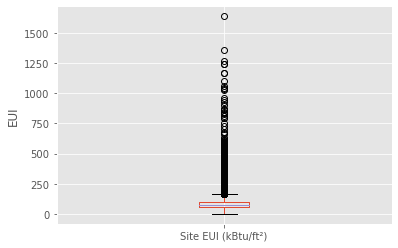

In [32]:
print(data2020.shape)

print(data2020[data2020['Site EUI (kBtu/ft²)'] <= 2000].shape)

#so removing rows where the EUI is above 2000 only removes about 800 records.

data2020[data2020['Site EUI (kBtu/ft²)'] <= 2000][['Site EUI (kBtu/ft²)']].boxplot()
plt.ylabel('EUI')

In [33]:
data2020[data2020['Site EUI (kBtu/ft²)'] <= 2000][['Site EUI (kBtu/ft²)']].describe()

Site EUI (kBtu/ft²)
count         27218.000000
mean             81.527015
std              58.417535
min               0.000000
25%              54.300000
50%              75.400000
75%              97.300000
max            1638.100000

In [34]:
clean_data2020 = data2020[data2020['Site EUI (kBtu/ft²)'] <= 2000]
clean_data2019 = data2019[data2019['Site EUI (kBtu/ft²)'] <= 2000]
clean_data2020[['Year Built','Site EUI (kBtu/ft²)','Total GHG Emissions (Metric Tons CO2e)','GSF','Borough']].corr()

#Corr here doesn't really do anything interesting. Except that EUI, GHG don't seem to correlate with year built. How do I
#do a correlation of categorical variables? chi squared according to internet.

Year Built  Site EUI (kBtu/ft²)  \
Year Built                                1.000000            -0.056291   
Site EUI (kBtu/ft²)                      -0.056291             1.000000   
Total GHG Emissions (Metric Tons CO2e)    0.051961             0.230813   
GSF                                       0.086236             0.028062   

                                        Total GHG Emissions (Metric Tons CO2e)  \
Year Built                                                            0.051961   
Site EUI (kBtu/ft²)                                                   0.230813   
Total GHG Emissions (Metric Tons CO2e)                                1.000000   
GSF                                                                   0.817046   

                                             GSF  
Year Built                              0.086236  
Site EUI (kBtu/ft²)                     0.028062  
Total GHG Emissions (Metric Tons CO2e)  0.817046  
GSF                                     1.000000

In [35]:
clean_data2020

Property Id                        Address 1 Postcode  \
0             7365  1155  Avenue  of  the  Americas    10036   
1             8139             200  East  42nd  St.    10017   
2             8604              114  West  47th  st    10036   
3             8841               733  Third  Avenue    10017   
4            11809                   4 Times Square    10036   
...            ...                              ...      ...   
28059     17051715                    820 39 Street    11232   
28060     17248794                120-11 109 Avenue    11420   
28061     17283996                3053 Villa Avenue    10468   
28062     17286197                   109 W 129th St    10027   
28065     17321529               402 EAST 78 STREET    10075   

      Primary Property Type - Self Selected  Year Built  Site EUI (kBtu/ft²)  \
0                                    Office        1982                 41.7   
1                                    Office        1956                234.9   
2                          Financial Office        1989                 56.0   
3                                    Office        1961                 70.4   
4                                    Office        1999                 78.7   
...                                     ...         ...                  ...   
28059                                 Hotel        1984                 95.2   
28060                   Multifamily Housing        1942                132.3   
28061                   Multifamily Housing        2020                  1.4   
28062               Senior Living Community        1920                117.3   
28065                   Multifamily Housing        1910                 88.9   

       Site Energy Use (kBtu)  Green Power - Onsite (kWh)  \
0                  28621509.3                         NaN   
1                  90318696.0                         NaN   
2                  32329714.8                         NaN   
3                  27516842.6                         NaN   
4                 126054250.5                         NaN   
...                       ...                         ...   
28059               2453403.5                         NaN   
28060               3835395.8                         NaN   
28061                 43986.5                         NaN   
28062               3088625.0                         NaN   
28065               2318409.0                         NaN   

       Total GHG Emissions (Metric Tons CO2e)    Borough  Longitude  \
0                                      2190.6  MANHATTAN -73.982826   
1                                      6184.2  MANHATTAN -73.974306   
2                                      2407.5  MANHATTAN -73.982504   
3                                      2003.9  MANHATTAN -73.972753   
4                                      8976.8  MANHATTAN -73.986244   
...                                       ...        ...        ...   
28059                                   154.8   BROOKLYN -73.996663   
28060                                   216.1     QUEENS -73.821113   
28061                                     3.5      BRONX -73.888230   
28062                                   184.0  MANHATTAN -73.944249   
28065                                   139.3  MANHATTAN -73.952824   

        Latitude        GSF  
0      40.756631   686838.0  
1      40.750698   384432.0  
2      40.758310   577534.0  
3      40.753074   390878.0  
4      40.756181  1601977.0  
...          ...        ...  
28059  40.646877    25781.0  
28060  40.682566    29000.0  
28061  40.873648    31396.0  
28062  40.810588    26324.0  
28065  40.771496    26090.0  

[27218 rows x 13 columns]

In [36]:
clean_data2019

Property Id                        Address 1 Postcode  \
0             7365  1155  Avenue  of  the  Americas    10036   
1             8139             200  East  42nd  St.    10017   
2             8604              114  West  47th  st    10036   
3             8841               733  Third  Avenue    10017   
4            11809                   4 Times Square    10036   
...            ...                              ...      ...   
29077     14272571               720 Livonia Avenue    11207   
29078     14302311               5601 Foster Avenue    11234   
29079     14308553                  30-33 32 Street    11102   
29080     14315113                   82-16 34th Ave    11372   
29081     14359386                 4370 Park Avenue    10457   

      Primary Property Type - Self Selected  Year Built  Site EUI (kBtu/ft²)  \
0                                    Office        1982                 50.1   
1                                    Office        1956                 95.2   
2                          Financial Office        1989                 67.4   
3                                    Office        1961                 99.4   
4                                    Office        1999                100.2   
...                                     ...         ...                  ...   
29077                           K-12 School        1970                 65.7   
29078                 Self-Storage Facility        2013                  9.2   
29079                   Multifamily Housing        1917                118.9   
29080                   Multifamily Housing        1930                 84.3   
29081        Manufacturing/Industrial Plant        1900                 23.2   

       Site Energy Use (kBtu)  Green Power - Onsite (kWh)  \
0                  34344218.3                         NaN   
1                  36613879.7                         NaN   
2                  38939555.8                         NaN   
3                  39212617.0                         NaN   
4                 160549289.2                         NaN   
...                       ...                         ...   
29077               1840350.7                         NaN   
29078                803082.4                         NaN   
29079               3328672.8                         NaN   
29080               3533618.0                         NaN   
29081                712688.4                         NaN   

       Total GHG Emissions (Metric Tons CO2e)    Borough   Latitude  \
0                                      2747.2  MANHATTAN  40.756631   
1                                      2752.2  MANHATTAN  40.750698   
2                                      3038.1  MANHATTAN  40.758310   
3                                      2913.5  MANHATTAN  40.753074   
4                                     12186.2  MANHATTAN  40.756181   
...                                       ...        ...        ...   
29077                                   117.3   BROOKLYN  40.665283   
29078                                    63.8   BROOKLYN  40.637999   
29079                                   247.8     QUEENS  40.765550   
29080                                   197.6     QUEENS  40.753750   
29081                                    56.6      BRONX  40.851469   

       Longitude        GSF  
0     -73.982826   684986.0  
1     -73.974306   384432.0  
2     -73.982504   577534.0  
3     -73.972753   394646.0  
4     -73.986244  1601977.0  
...          ...        ...  
29077 -73.890432    28000.0  
29078 -73.922951    86902.0  
29079 -73.921363    28000.0  
29080 -73.884789    41903.0  
29081 -73.897177    30760.0  

[28274 rows x 13 columns]

In [58]:
#Which borough has the highest average EUI? I think I should stick to 2019 data.
clean_data2019.groupby(['Borough']).agg('mean')[['Site EUI (kBtu/ft²)']]

Site EUI (kBtu/ft²)
Borough                       
BRONX                93.999886
BROOKLYN             83.169140
MANHATTAN            90.655705
QUEENS               90.172669
STATEN IS            95.270054

Text(0.5, 1.0, 'Top 10 Property Types contributing to GHG Emissions')

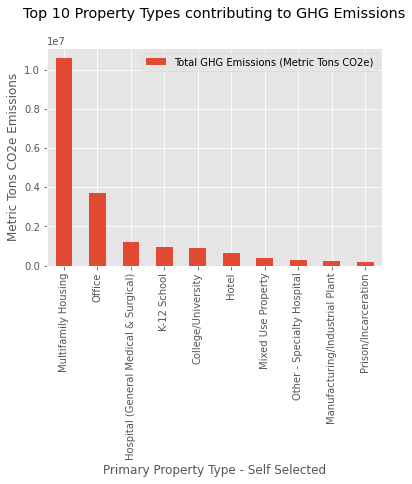

In [66]:
#which usage types contribute the most to GHG emissions

prop_type_ghg = clean_data2019.groupby(['Primary Property Type - Self Selected']).agg('sum')[['Total GHG Emissions (Metric Tons CO2e)']]\
.sort_values('Total GHG Emissions (Metric Tons CO2e)', ascending = False).iloc[0:10,]

prop_type_ghg.plot(kind= 'bar')
plt.ylabel('Metric Tons CO2e Emissions')
plt.title('Top 10 Property Types contributing to GHG Emissions', pad = 30)